In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




In [4]:
# Function to do some text prepocessing and simplify the databases
def preprocess_text(text):
    text = text.lower()  
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in string.punctuation]  
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [15]:
# Importing the sentiment panda dataframes
%cd C:\Users\alexh\PycharmProjects\proj_bach
from data_retriever import data1, data2
%cd baselines

C:\Users\alexh\PycharmProjects\proj_bach
C:\Users\alexh\PycharmProjects\proj_bach\baselines


C:\Users\alexh\miniconda3\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [16]:
# Checking the imports
print(data1.head(), data2.head())

                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative                                                 Text Sentiment
0                                                NaN   neutral
1                     Sage Act upgrade list tommorow  Positive
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  Negative
3  eye  true hazel eyeand brilliant  Regular feat...  Positive
4    ugh babe hugggzzz u  babe naamazed nga ako e...  Positive


In [17]:
# Actually preprocessing the dataframes
nltk.download('punkt')
nltk.download('stopwords')
X_1,y_1, X_2, y_2 =[],[],[],[]
for i in range(len(data1['Text'])):
    X_1.append(preprocess_text(str(data1['Text'][i])))
    y_1.append(data1['Sentiment'][i])
for i in range(len(data2['Text'])):
    X_2.append(preprocess_text(str(data2['Text'][i])))
    y_2.append(data2['Sentiment'][i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Testing the processed dataframes 
print(len(X_1),len(y_1),len(X_2),len(y_2))
print(X_1[:5], y_1[:5], X_2[:5], y_2[:5])

7480 7480 30730 30730
['period falling love time met especially met long time', 'involved traffic accident', 'driving home several days hard work motorist ahead driving 50 km/hour refused despite low speeed let overtake', 'lost person meant', "time knocked deer sight animal 's injuries helplessness realization animal badly hurt put animal screamed moment death"] ['Positive', 'Negative', 'Negative', 'Negative', 'Negative'] ['nan', 'sage act upgrade list tommorow', 'way homegirl baby funeral man hate funerals shows blessed', 'eye true hazel eyeand brilliant regular features open countenance complexion oh bloom health pretty height size firm upright figure health merely bloom air head glance hears child picture health gives idea complete picture grownup health loveliness', 'ugh babe hugggzzz u babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang'] ['neutral', 'Positive', 'Negative', 'Positive', 'Positive']


<Axes: >

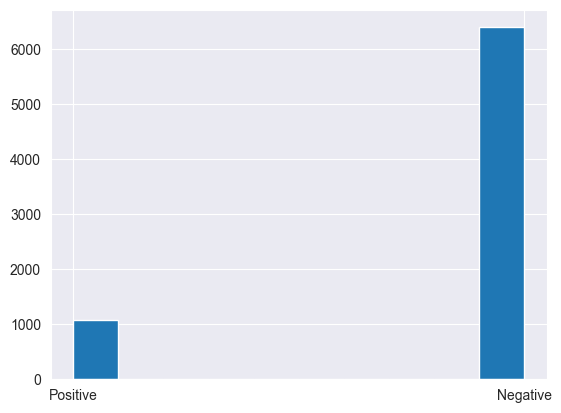

In [19]:
data1['Sentiment'].hist()

<Axes: >

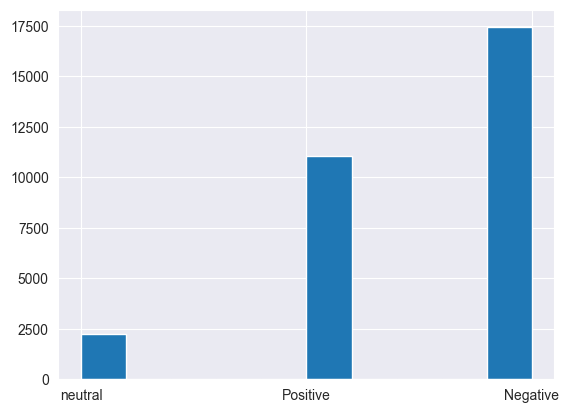

In [20]:
data2['Sentiment'].hist()

In [21]:
data1['Sentiment'].value_counts()

Sentiment
Negative    6396
Positive    1084
Name: count, dtype: int64

In [22]:
data2['Sentiment'].value_counts()


Sentiment
Negative    17431
Positive    11045
neutral      2254
Name: count, dtype: int64

In [23]:
print(data1.head())
print(data2.head())

                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative
                                                Text Sentiment
0                                                NaN   neutral
1                     Sage Act upgrade list tommorow  Positive
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  Negative
3  eye  true hazel eyeand brilliant  Regular feat...  Positive
4    ugh babe hugggzzz u  babe naamazed nga ako e...  Positive


In [24]:
nums_1 = [0 if i=='Negative' else 1 for i in data1['Sentiment']]
nums_2 = [0 if i=='Negative' else 1 if i=='neutral' else 2 for i in data2['Sentiment']]

In [25]:
print(nums_1[:10], nums_2[:10])

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0] [1, 2, 0, 2, 2, 0, 0, 0, 0, 2]


In [26]:
# Combine datasets
combined_data = X_1 + X_2

# Initialize and fit the TF-IDF vectorizer on the combined data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(combined_data)

# Now transform both datasets separately using the same vectorizer
X_1_mod = tfidf_vectorizer.transform(X_1)
X_2_mod = tfidf_vectorizer.transform(X_2)

In [27]:
print(len(X_1))

7480


In [28]:
print(X_2_mod)

  (0, 18272)	1.0
  (1, 29355)	0.5028969092848553
  (1, 28123)	0.4752096925285781
  (1, 23886)	0.517130095818518
  (1, 16004)	0.35721960353446747
  (1, 940)	0.35530418743386954
  (2, 30173)	0.22058278015642177
  (2, 24921)	0.34675101856701446
  (2, 16709)	0.22424590046093745
  (2, 12998)	0.4532949953073799
  (2, 12487)	0.24390017466227787
  (2, 11027)	0.47087924898464667
  (2, 11026)	0.3233757613364605
  (2, 3432)	0.33489880432011393
  (2, 2530)	0.27820987958254756
  (3, 29378)	0.18145401704589623
  (3, 28586)	0.10730718570561308
  (3, 25188)	0.13992634689552647
  (3, 22882)	0.1489340369415651
  (3, 21315)	0.11316932853884804
  (3, 20613)	0.2527482208428456
  (3, 19435)	0.10853807046931106
  (3, 19247)	0.0886208009097156
  (3, 17306)	0.16614099944084568
  (3, 16320)	0.18145401704589623
  :	:
  (30723, 1218)	0.19082395813718053
  (30724, 29194)	0.48180991189549843
  (30724, 29070)	0.6402309231504315
  (30724, 1039)	0.5983005714866052
  (30725, 30727)	0.41626288108611303
  (30725, 28659)	

In [29]:
print(X_1_mod.shape)
print(len(nums_1))

(7480, 31413)
7480


In [30]:
print(X_2_mod.shape)
print(len(nums_2))

(30730, 31413)
30730


In [31]:
X_1_train,X_1_test,y_1_train,y_1_test = train_test_split(X_1_mod,nums_1,test_size=0.9,random_state=42)
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2_mod,nums_2,test_size=0.9,random_state=42)


In [32]:
print(X_1_train)

  (0, 30798)	0.1899835761945859
  (0, 29457)	0.29484434701642365
  (0, 28621)	0.2650905356148115
  (0, 27925)	0.32564749811811305
  (0, 26214)	0.25067478611783617
  (0, 24864)	0.2831340882929674
  (0, 17499)	0.2636977458607256
  (0, 16843)	0.2983717211096825
  (0, 16540)	0.24434175673815448
  (0, 16198)	0.29631956719943564
  (0, 15618)	0.31655390478142686
  (0, 11721)	0.17825430096460268
  (0, 9449)	0.26347008682409345
  (0, 2586)	0.224016035452721
  (1, 30731)	0.1712115780894389
  (1, 28983)	0.25012387973105066
  (1, 28809)	0.17049032445053589
  (1, 28501)	0.16211154896846888
  (1, 28434)	0.21196316050200023
  (1, 27805)	0.19599303532662732
  (1, 27144)	0.18034086130584853
  (1, 25169)	0.17333984264649327
  (1, 20340)	0.12105296390266616
  (1, 20045)	0.20077819862214766
  (1, 19599)	0.18314488679369176
  :	:
  (744, 13544)	0.4003587722919626
  (744, 10847)	0.22708048066765574
  (744, 5566)	0.5263043589195314
  (744, 5415)	0.2910046594617847
  (744, 2461)	0.2774132464417098
  (745, 118

In [33]:
print(y_2_test[:10])

[0, 0, 0, 0, 0, 2, 2, 2, 0, 2]


In [34]:
def testShow(mode1, mode2):
    print("Test DS1: ", round(accuracy_score(mode1.predict(X_1_test),y_1_test), 4), " Train DS1: ", round(accuracy_score(mode1.predict(X_1_train),y_1_train), 4))
    print("Test DS2: ", round(accuracy_score(mode2.predict(X_2_test),y_2_test), 4)," Train DS2: ", round(accuracy_score(mode2.predict(X_2_train),y_2_train), 4))

In [35]:
def testUnseen(mode1, mode2):
    print("Testing results on unseen datasets : ")
    print("Test Accuracy DS1 mod on DS2: ",round(accuracy_score(mode1.predict(X_2_test[:8833]),y_2_test[:8833]), 4), "VS Train Accuracy: ", round(accuracy_score(mode1.predict(X_1_train),y_1_train), 4))
    print("Test Accuracy DS2 mod on DS1: ",round(accuracy_score(mode2.predict(X_1_test),y_1_test), 4), "VS Train Accuracy: ", round(accuracy_score(mode2.predict(X_2_train),y_2_train), 4))

In [36]:
lr1 = LogisticRegression()
lr2 = LogisticRegression()
svm1 = SVC()
svm2 = SVC()
mnb1 = MultinomialNB()
mnb2 = MultinomialNB()

In [37]:
lr1.fit(X_1_train,y_1_train)
# Problem, the Logistic Regression class is a classifier and not a real regression, thus it only takes y with values 0 or 1, thus our label 2 won't be taken into account, however Scikit learn uses OVR by default for >2 classes
lr2.fit(X_2_train,y_2_train)

LogisticRegression()

In [38]:
testShow(lr1, lr2)

Test DS1:  0.8561  Train DS1:  0.8703
Test DS2:  0.7186  Train DS2:  0.9157


In [39]:
testUnseen(lr1, lr2)

Testing results on unseen datasets : 
Test Accuracy DS1 mod on DS2:  0.5689 VS Train Accuracy:  0.8703
Test Accuracy DS2 mod on DS1:  0.8057 VS Train Accuracy:  0.9157


In [40]:
svm1.fit(X_1_train,y_1_train)
svm2.fit(X_2_train,y_2_train)

SVC()

In [189]:
testShow(svm1, svm2)

Test DS1:  0.8611  Train DS1:  0.9759
Test DS2:  0.7014  Train DS2:  0.9642


In [190]:
testUnseen(svm1, svm2)

Testing results on unseen datasets : 
Test Accuracy DS1 mod on DS2:  0.569 VS Train Accuracy:  0.9759
Test Accuracy DS2 mod on DS1:  0.8289 VS Train Accuracy:  0.9642


In [191]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_1_train,y_1_train)
dt2 = DecisionTreeClassifier()
dt2.fit(X_2_train,y_2_train)

DecisionTreeClassifier()

In [192]:
testShow(dt1, dt2)

Test DS1:  0.8636  Train DS1:  1.0
Test DS2:  0.6102  Train DS2:  0.9977


In [193]:
testUnseen(dt1, dt2)

Testing results on unseen datasets : 
Test Accuracy DS1 mod on DS2:  0.54 VS Train Accuracy:  1.0
Test Accuracy DS2 mod on DS1:  0.5876 VS Train Accuracy:  0.9977


In [194]:
rf1 = RandomForestClassifier()
rf1.fit(X_1_train,y_1_train)
rf2 = RandomForestClassifier()
rf2.fit(X_2_train,y_2_train)

RandomForestClassifier()

In [195]:
accuracy_score(rf1.predict(X_1_test),y_1_test),accuracy_score(rf1.predict(X_1_train),y_1_train)

(0.8670528817587642, 1.0)

In [196]:
accuracy_score(rf2.predict(X_2_test),y_2_test),accuracy_score(rf2.predict(X_2_train),y_2_train)


(0.7053910402429765, 0.9977220956719818)

In [197]:
testShow(rf1, rf2)

Test DS1:  0.8671  Train DS1:  1.0
Test DS2:  0.7054  Train DS2:  0.9977


In [198]:
testUnseen(rf1, rf2)

Testing results on unseen datasets : 
Test Accuracy DS1 mod on DS2:  0.5685 VS Train Accuracy:  1.0
Test Accuracy DS2 mod on DS1:  0.7491 VS Train Accuracy:  0.9977
